In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import string


In [39]:
csv_file_path = './airbnb_dataset/data.csv'
df = pd.read_csv(csv_file_path)
df.head()

,id,log_price,accommodates,bathrooms,description,host_response_rate,name,bedrooms,beds,property_type_Apartment,...,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,cleaning_fee_False,cleaning_fee_True,host_has_profile_pic_f,host_has_profile_pic_t
0,6901257,5.010635,3.0,1.0,"Beautiful, sunlit brownstone 1-bedroom in the ...",100.0,Beautiful brownstone 1-bedroom,1.0,1.0,True,...,False,False,False,False,True,False,False,True,False,True
1,6304928,5.129899,7.0,1.0,Enjoy travelling during your stay in Manhattan...,100.0,Superb 3BR Apt Located Near Times Square,3.0,3.0,True,...,False,False,False,False,True,False,False,True,False,True
2,7919400,4.976734,5.0,1.0,The Oasis comes complete with a full backyard ...,100.0,The Garden Oasis,1.0,3.0,True,...,False,False,False,False,True,False,False,True,False,True
3,13418779,6.620073,4.0,1.0,This light-filled home-away-from-home is super...,100.0,Beautiful Flat in the Heart of SF!,2.0,2.0,False,...,False,False,False,False,False,True,False,True,False,True
4,3808709,4.744932,2.0,1.0,"Cool, cozy, and comfortable studio located in ...",100.0,Great studio in midtown DC,0.0,1.0,True,...,False,False,True,False,False,False,False,True,False,True


In [40]:
# Load sentiment_dict from a created file
sentiment_dict = {}
with open('airbnb_dataset/tfidf_dict.txt', 'r') as f:
    for line in f:
        word, theta = line.split()
        sentiment_dict[word] = float(theta)

In [41]:
name_dict = {}
with open('airbnb_dataset/name_dict.txt', 'r') as f:
    for line in f:
        word, theta = line.split()
        name_dict[word] = float(theta)

In [42]:
punctuation = set(string.punctuation)

def sentiment(d):
    sentimentScore = 0
    r = ''.join([c for c in d.lower() if not c in punctuation])
    for w in r.split():
        sentimentScore += sentiment_dict.get(w, 0)
    return sentimentScore

In [43]:
def name(d):
    sentimentScore = 0
    r = ''.join([c for c in d.lower() if not c in punctuation])
    for w in r.split():
        sentimentScore += name_dict.get(w, 0)
    return sentimentScore

In [44]:
# Calculate each description's sentiment score
def des_sentiment(row):
    # This function will be applied to each row in the DataFrame
    if pd.notnull(row['description']):
        return sentiment(row['description'])
    else:
        return 0

def name_sentiment(row):
    if pd.notnull(row['description']):
        return name(row['description'])
    else:
        return 0
    
# Apply the function to each row
df['des_sentiment_analysis'] = df.apply(des_sentiment, axis=1)
df['name_sentiment_analysis'] = df.apply(name_sentiment, axis=1)


In [45]:
# Min-Max Nomarlization
cols_to_normalize = [
    'accommodates', 'bathrooms', 'bedrooms', 'beds', 'des_sentiment_analysis','host_response_rate'
]

df[cols_to_normalize] = (df[cols_to_normalize] - df[cols_to_normalize].min()) / (df[cols_to_normalize].max() - df[cols_to_normalize].min())


df.shape, df[cols_to_normalize].head()

((73923, 69),
    accommodates  bathrooms  bedrooms      beds  des_sentiment_analysis   
 0      0.133333      0.125       0.1  0.055556                0.546844  \
 1      0.400000      0.125       0.3  0.166667                0.602953   
 2      0.266667      0.125       0.1  0.166667                0.600378   
 3      0.200000      0.125       0.2  0.111111                0.546608   
 4      0.066667      0.125       0.0  0.055556                0.518090   
 
    host_response_rate  
 0                 1.0  
 1                 1.0  
 2                 1.0  
 3                 1.0  
 4                 1.0  )

In [46]:

#pip install scikit-learn


In [197]:
# Standardlization 
from sklearn.preprocessing import StandardScaler

columns_to_standardize = [
    'accommodates', 'bathrooms', 'bedrooms', 'beds', 'des_sentiment_analysis','host_response_rate'
]

scaler = StandardScaler()
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

df.shape, df[columns_to_standardize].head()

((73923, 68),
    accommodates  bathrooms  bedrooms      beds  des_sentiment_analysis   
 0     -0.072621  -0.404046 -0.312048 -0.566461                0.216242  \
 1      1.783653  -0.404046  2.034955  1.027816                0.837002   
 2      0.855516  -0.404046 -0.312048  1.027816                0.808508   
 3      0.391448  -0.404046  0.861454  0.230678                0.213627   
 4     -0.536689  -0.404046 -1.485549 -0.566461               -0.101872   
 
    host_response_rate  
 0            0.296013  
 1            0.296013  
 2            0.296013  
 3            0.296013  
 4            0.296013  )

In [198]:
df.drop(['description'], axis=1, inplace=True)

KeyError: "['description'] not found in axis"

In [ ]:
df.head()

,id,log_price,accommodates,bathrooms,host_response_rate,name,bedrooms,beds,property_type_Apartment,property_type_Bed & Breakfast,...,city_DC,city_LA,city_NYC,city_SF,cleaning_fee_False,cleaning_fee_True,host_has_profile_pic_f,host_has_profile_pic_t,des_sentiment_analysis,name_sentiment_analysis
0,6901257,5.010635,-0.072621,-0.404046,0.296013,Beautiful brownstone 1-bedroom,-0.312048,-0.566461,True,False,...,False,False,True,False,False,True,False,True,0.216242,-0.435248
1,6304928,5.129899,1.783653,-0.404046,0.296013,Superb 3BR Apt Located Near Times Square,2.034955,1.027816,True,False,...,False,False,True,False,False,True,False,True,0.837002,-1.788095
2,7919400,4.976734,0.855516,-0.404046,0.296013,The Garden Oasis,-0.312048,1.027816,True,False,...,False,False,True,False,False,True,False,True,0.808508,-0.133695
3,13418779,6.620073,0.391448,-0.404046,0.296013,Beautiful Flat in the Heart of SF!,0.861454,0.230678,False,False,...,False,False,False,True,False,True,False,True,0.213627,-0.926212
4,3808709,4.744932,-0.536689,-0.404046,0.296013,Great studio in midtown DC,-1.485549,-0.566461,True,False,...,True,False,False,False,False,True,False,True,-0.101872,-0.095776


Linear Regression Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [199]:
X = df.drop(['log_price', 'id', 'name'], axis=1)  
y = df['log_price']


In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [131]:
lr = LinearRegression()
lr.fit(X_train,y_train)
yhat_test=lr.predict(X_test)
mse = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.1220830903327685e+17


In [132]:
# pip install plotly

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

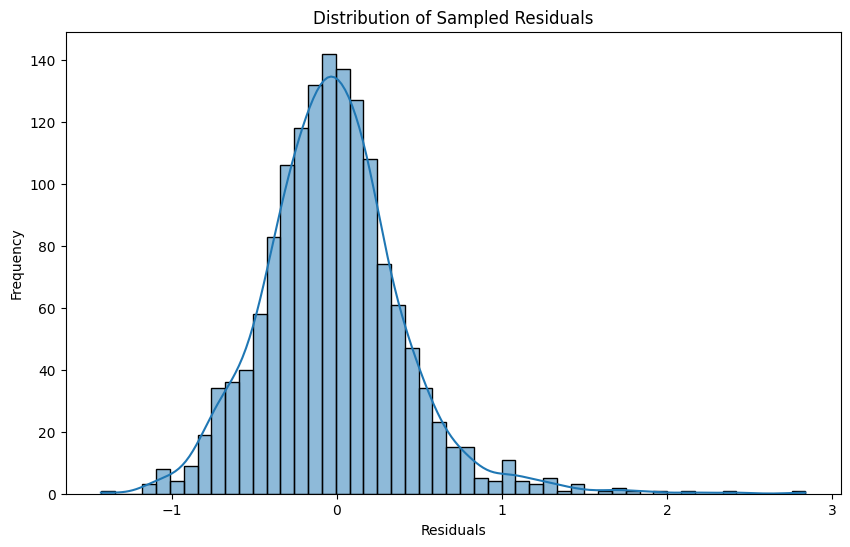

In [134]:
residuals = y_test-yhat_test
# Sample a fraction of the residuals because the size of residuals is too large
residuals_sample = residuals.sample(frac=0.1,random_state = 40 )  # Adjust frac as needed

plt.figure(figsize=(10, 6))
sns.histplot(residuals_sample, kde=True)
plt.title('Distribution of Sampled Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [180]:
# Plot the truth vs prediction
def plot_truth_vs_pred(df_plot,degree):
  # plot all the datas
  fig = px.scatter(df_plot, x='ground truth', y='Predicted', title=f'Truth vs Prediction (Degree {degree})')

  cof = np.polyfit(df_plot['ground truth'], df_plot['Predicted'], degree)
  poly = np.poly1d(cof)
  x_values = np.linspace(df_plot['ground truth'].min(), df_plot['ground truth'].max(), 100)
  fitted_y_values = poly(x_values)

  # Add the y = x line
  fig.add_trace(go.Scatter(x=df_plot['ground truth'], y=df_plot['ground truth'], mode='lines', name='ground truth line', line=dict(color='firebrick', width=2)))

  # Add the polynomial fit line
  if degree > 1:
      fig.add_trace(go.Scatter(x=x_values, y=fitted_y_values, mode='lines', name=f'Polynomial Fit Degree {degree}', line=dict(color='royalblue', width=2)))

  fig.update_layout(title='Polynomial Fit According to Degree', xaxis_title='Ground Truth', yaxis_title='Predicted')
  fig.show()

  
# Plot the residuals
def plot_residuals(df_plot):
  plt.figure(figsize=(10, 6))
  
  # Plot the residuals
  sns.scatterplot(x='Predicted', y='Residuals', data=df_plot, alpha=0.5)
  
  plt.title('Sampled Residuals vs. Predicted Values')
  plt.xlabel('Predicted Values')
  plt.ylabel('Sampled Residuals')
  
  # Add a horizontal line at y = 0
  plt.axhline(y=0, color='red', linestyle='--') 
  plt.show()


def plot_regression(df_plot, degree):
  # y_test = df_plot['ground truth']
  # yhat_test = df_plot['Predicted']
  
  # m, b = np.polyfit(y_test, yhat_test, 1)

  # x_fit = np.linspace(y_test.min(), y_test.max(), 100)
  # y_fit = m * x_fit + b  # Apply the equation of the line

  # plt.scatter(y_test, yhat_test, color='blue', label='Actual Data Points', alpha=0.5)

  # plt.plot(x_fit, y_fit, color='red', label='Prediction Line')

  # plt.show()
  
  sns.regplot(data=df_plot, x='ground truth', y='Predicted', order = degree, ci = 99, color='blue', line_kws=dict(color="r"), scatter_kws={'alpha':0.5})

# Plot the graphs
def plot_graphs(y_test, yhat_test, degree=1):
  df_plot = pd.DataFrame({'ground truth':y_test, 'Predicted': yhat_test, 'Residuals': y_test-yhat_test})
  df_plot = df_plot[np.abs(df_plot['Residuals']) < 0.9 * np.max(np.abs(df_plot['Residuals']))]
  df_sample = df_plot.sample(frac=0.1,random_state=40)
  
  plot_truth_vs_pred(df_sample,degree)
  plot_residuals(df_sample) 
  plot_regression(df_sample, degree)

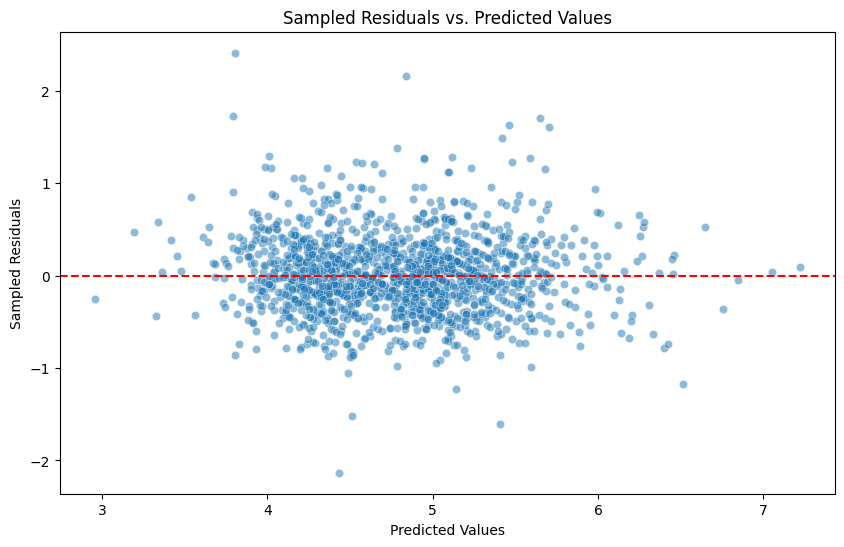

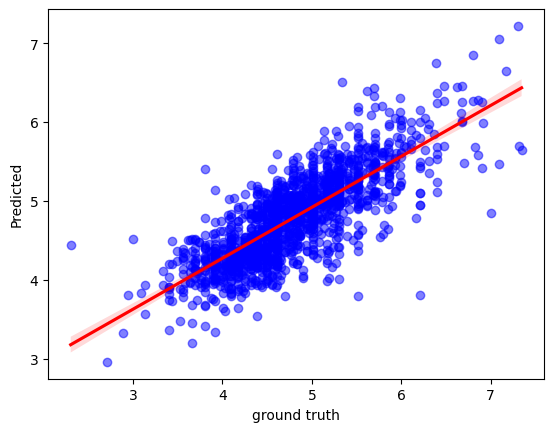

In [181]:

plot_graphs(y_test, yhat_test, degree=1)

In [150]:
m = lr.coef_[0]
b = lr.intercept_
print(m,b)
y_fit = m * 1 + b  # Apply the equation of the line
print(y_fit)

0.1376287751585077 554342011720.567
554342011720.7046


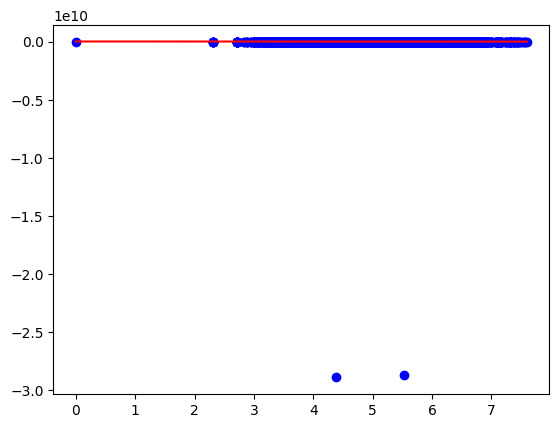

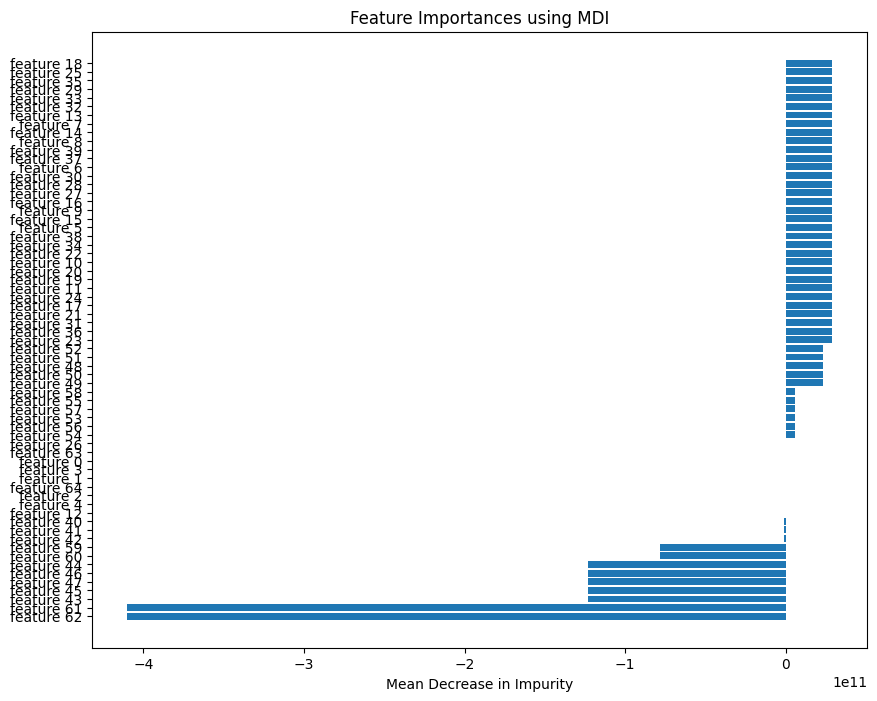

In [182]:
import matplotlib.pyplot as plt

# Get the feature importances
feature_importances = lr.coef_
feature_names = ['feature {}'.format(i) for i in range(len(feature_importances))] 

# Sort the features by importance
sorted_idx = np.argsort(feature_importances)
sorted_importances = feature_importances[sorted_idx]
sorted_features = [feature_names[i] for i in sorted_idx]

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_importances)), sorted_importances, align='center')
plt.yticks(range(len(sorted_importances)), sorted_features)
plt.xlabel('Mean Decrease in Impurity')
plt.title('Feature Importances using MDI')
plt.show()

# # Create a barh (horizontal bar chart) with the feature importances
# plt.barh(range(len(feature_importances)), feature_importances, color='blue')

# # Set the y-ticks to be the feature names
# plt.yticks(range(len(feature_importances)), feature_names)

# # Set the labels and title
# plt.xlabel('Mean decrease in impurity')
# plt.title('Feature importances using MDI')

# # Show the plot
# plt.show()

In [201]:
lr = LinearRegression()
history = lr.fit(X_train,y_train)

TypeError: 'LinearRegression' object is not subscriptable

In [196]:


print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf

SystemError: initialization of _pywrap_checkpoint_reader raised unreported exception

2nd Polynomial Regression

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd

In [184]:
X = df.drop('log_price', axis=1)  
y = df['log_price']  

In [185]:
features = [col for col in df.columns if col != 'log_price' and df[col].dtype in ['int64', 'float64']]
X = df[features]

In [186]:
degree = 2  # Degree of polynomial features
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)


In [187]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [188]:
model = LinearRegression()
model.fit(X_train, y_train)
yhat_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R2 score: {r2}')

MSE: 0.2340382008108095
R2 score: 0.5557872728053866


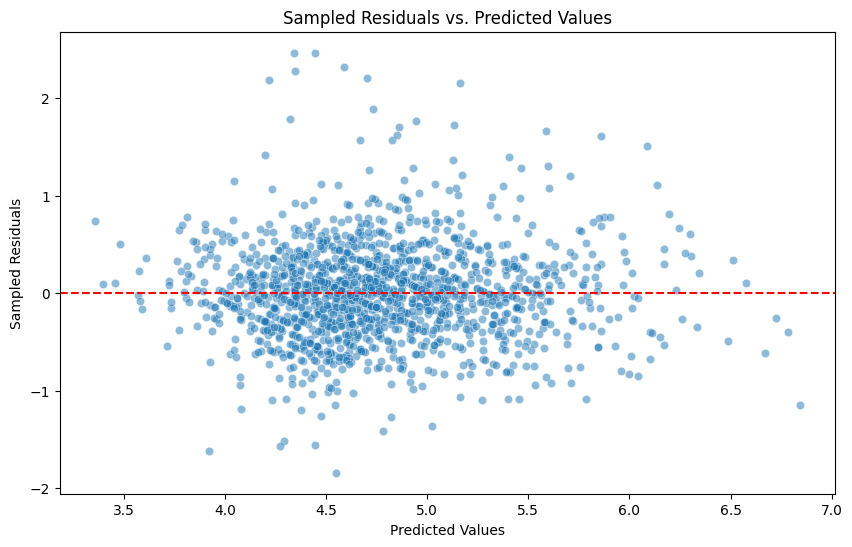

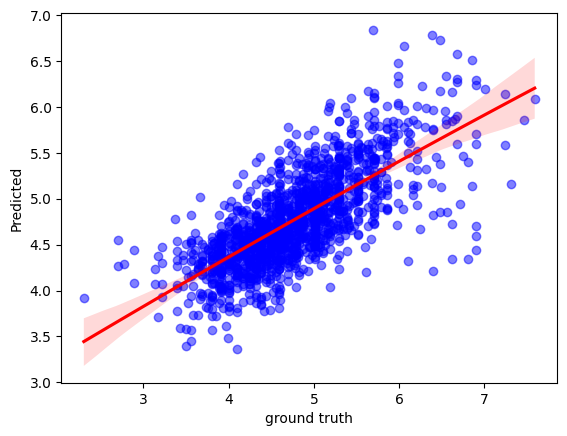

In [189]:
plot_graphs(y_test, y_pred, degree)

3rd Polynomial Regression model

In [190]:
degree = 3  # Degree of polynomial features
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [192]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R2 score: {r2}')

MSE: 0.27413645911993484
R2 score: 0.4796793698325317


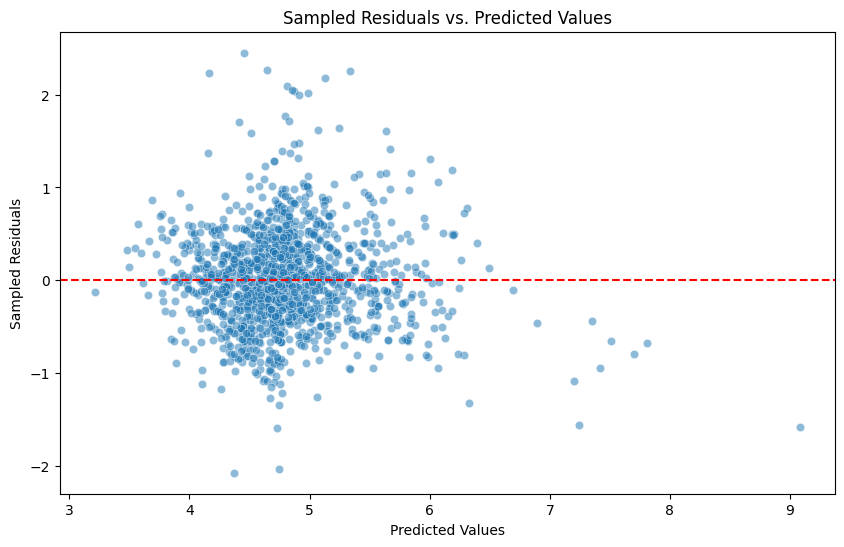

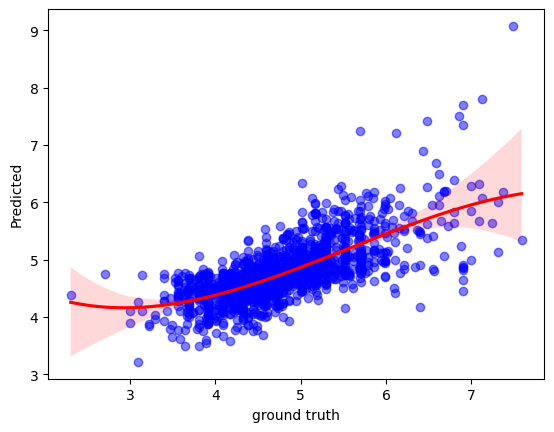

In [193]:
plot_graphs(y_test, y_pred, degree)